# Adipurush Sentiment Analysis: Harnessing Machine Learning to Understand Twitter Buzz

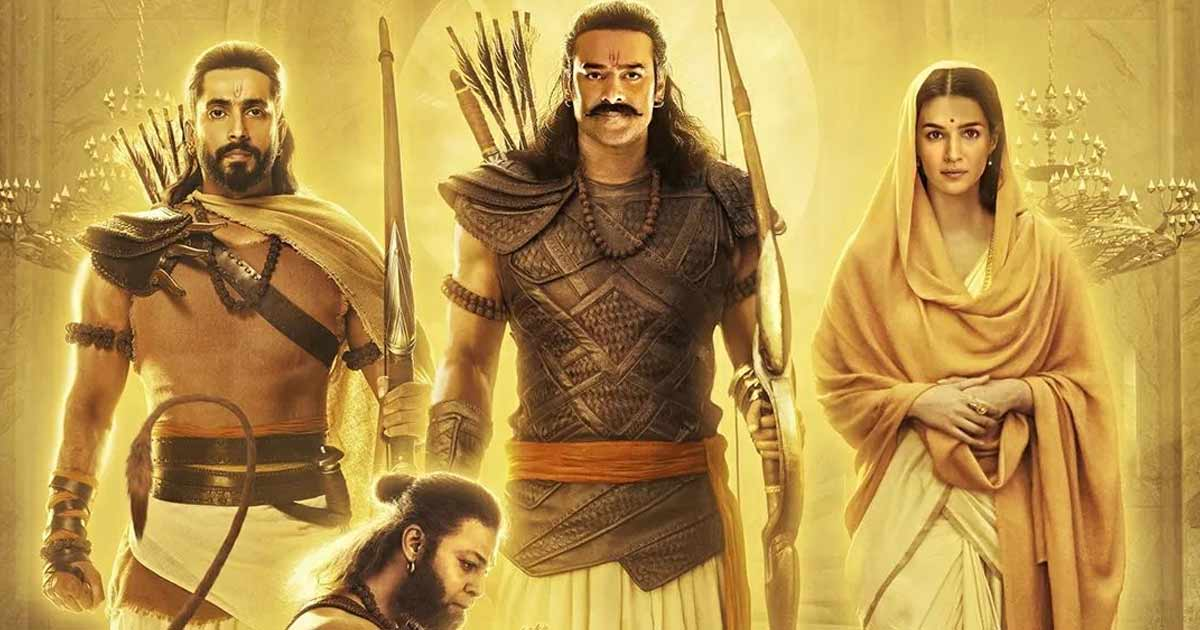

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('adipurush_tweets.csv')

In [5]:
df

Date Created  Number of Likes  Source of Tweet  \
0      2023-06-30 09:21:00+00:00                0              NaN   
1      2023-06-30 09:20:57+00:00                0              NaN   
2      2023-06-30 09:20:22+00:00                0              NaN   
3      2023-06-30 09:20:00+00:00                3              NaN   
4      2023-06-30 09:15:22+00:00                3              NaN   
...                          ...              ...              ...   
9996   2023-06-23 10:08:50+00:00                0              NaN   
9997   2023-06-23 10:08:49+00:00                0              NaN   
9998   2023-06-23 10:08:17+00:00             3101              NaN   
9999   2023-06-23 10:08:01+00:00                0              NaN   
10000  2023-06-23 10:07:45+00:00                0              NaN   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10001 rows x 4 columns]

In [6]:
df.shape

(10001, 4)

In [7]:
df.columns

Index(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweets'], dtype='object')

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Date Created           0
Number of Likes        0
Source of Tweet    10000
Tweets                 0
dtype: int64

In [11]:
df = df.drop('Source of Tweet', axis = 1)

In [12]:
df

Date Created  Number of Likes  \
0      2023-06-30 09:21:00+00:00                0   
1      2023-06-30 09:20:57+00:00                0   
2      2023-06-30 09:20:22+00:00                0   
3      2023-06-30 09:20:00+00:00                3   
4      2023-06-30 09:15:22+00:00                3   
...                          ...              ...   
9996   2023-06-23 10:08:50+00:00                0   
9997   2023-06-23 10:08:49+00:00                0   
9998   2023-06-23 10:08:17+00:00             3101   
9999   2023-06-23 10:08:01+00:00                0   
10000  2023-06-23 10:07:45+00:00                0   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10000 rows x 3 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     10000 non-null  object
 1   Number of Likes  10000 non-null  int64 
 2   Tweets           10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [14]:
df.describe()

Number of Likes
count     10000.000000
mean         73.544500
std         369.705682
min           0.000000
25%           0.000000
50%           1.000000
75%           9.000000
max       14778.000000

In [15]:
df.nunique()

Date Created       9831
Number of Likes     718
Tweets             9874
dtype: int64

In [16]:
df_sorted = df.sort_values(by='Number of Likes', ascending=False)

In [17]:
df_sorted.head(10)

Date Created  Number of Likes  \
5036  2023-06-26 02:51:52+00:00            14778   
2975  2023-06-27 12:35:31+00:00             8266   
8180  2023-06-24 09:10:09+00:00             8112   
3593  2023-06-27 02:23:37+00:00             7010   
6069  2023-06-25 07:20:59+00:00             5580   
3601  2023-06-27 01:59:03+00:00             5149   
4744  2023-06-26 06:20:58+00:00             4912   
4716  2023-06-26 06:30:01+00:00             4788   
5636  2023-06-25 13:08:17+00:00             4741   
1559  2023-06-28 14:40:47+00:00             4561   

                                                 Tweets  
5036  Pan India Star #Prabhas clearly said NO for #A...  
2975  #Breaking: Comments by Allahabad high court to...  
8180  #Adipurush #Prabhas #BhushanKumar https://t.co...  
3593  आदिपुरुष निर्माताओं को लगा एक और झटका, इलाहाबा...  
6069  👉#AdiPurush Telugu Version Hits 100CR SHARE💥💥💥...  
3601  #Adipurush WW BO\n\nZOOMS past ₹4⃣0⃣0⃣ cr.\n\n...  
4744  #Adipurush goes from strength to strength at t...  
4716  We are incredibly touched by the overwhelming ...  
5636  Witness the epic saga unfold!🏹 \nBook your tic...  
1559  कुरान पर गलत तथ्यों के साथ एक छोटी सी डॉक्यूमे...

In [18]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

In [19]:
df

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...  
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...  
2                                 @ponilemova #Adipurush  
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...  
4                 ST: #Adipurush https://t.co/lsGKcgQuKL  
...                                                  ...  
9996   Adipurush 1st Week WW Box Office Collections: ...  
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...  
9998   Let the empowering lyrics of #Shivoham elevate...  
9999   When it comes to choosing a service or product...  
10000  A film about #Ramayana, our greatest epic coul...  

[10000 rows x 3 columns]

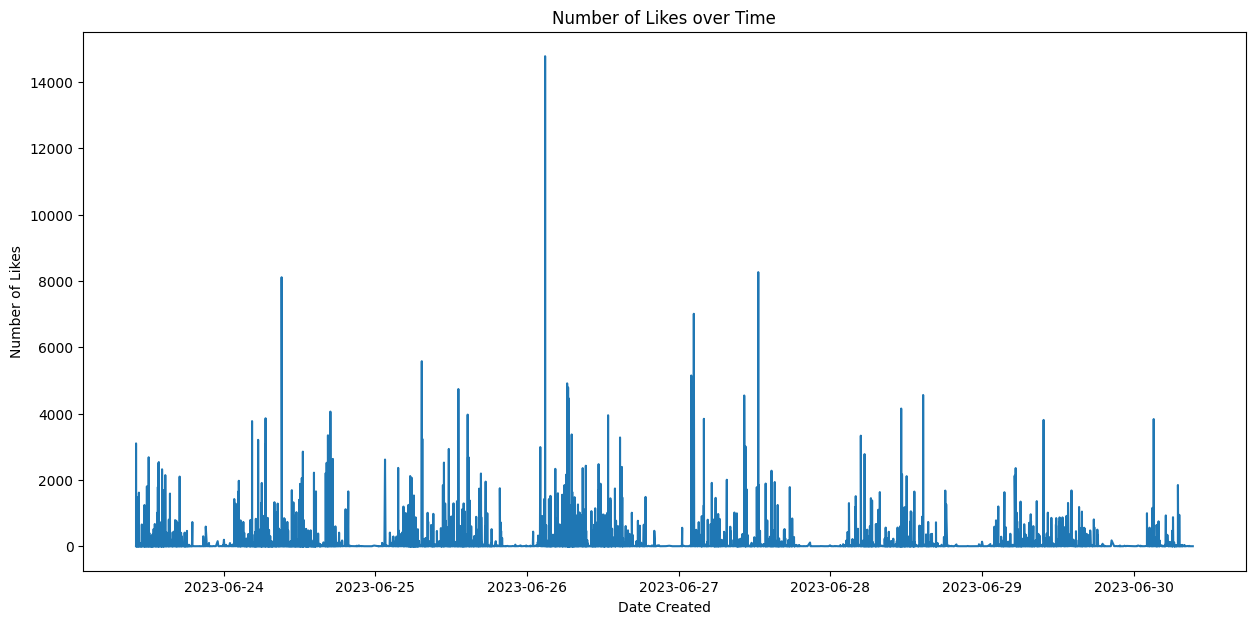

In [20]:
df_sorted_date = df.sort_values('Date Created')
plt.figure(figsize=[15,7],)
plt.plot(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

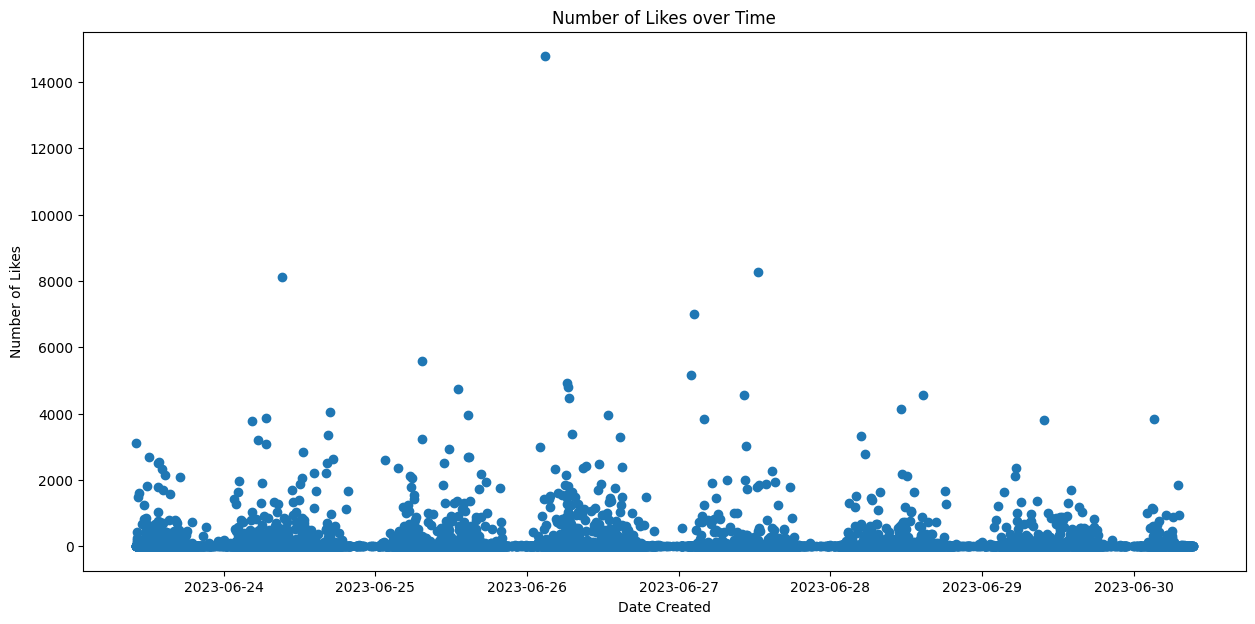

In [21]:
plt.figure(figsize=[15,7],)
plt.scatter(df_sorted_date['Date Created'], df_sorted_date['Number of Likes'])
plt.xlabel('Date Created')
plt.ylabel('Number of Likes')
plt.title('Number of Likes over Time')
plt.show()

In [22]:
import re
import string
from tqdm.notebook import tqdm
from datetime import datetime
import dateutil.parser

In [23]:
import nltk
from spellchecker import spellchecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [24]:
from wordcloud import wordcloud, ImageColorGenerator
from nltk.corpus import stopwords
import random 

In [25]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
languages = stopwords.fileids()

# Print the number of supported languages
print("Number of supported languages:", len(languages))

# Print the list of supported languages
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [27]:
from nltk.tokenize import TweetTokenizer

In [28]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [29]:
def clean_tweet(tweet):
    # Remove URLs, hashtags, mentions, and special characters
    tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet

In [30]:
df['Cleaned_Tweets'] = df['Tweets'].apply(clean_tweet)

In [31]:
df

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets  
0      womens ashes 2023 live streaming broadcast tv ...  
1                                    playing book ticket  
2                                                         
3      adipurush vs 72 hoorain vs kerala story contro...  
4                                                     st  
...                                                  ...  
9996   adipurush 1st week ww box office collections ఆ...  
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[10000 rows x 4 columns]

In [32]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [33]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: clean_text(x))

In [34]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [35]:
df.Cleaned_Tweets = df.Cleaned_Tweets.apply(lambda x: tokenization(x))

In [36]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [37]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [38]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [39]:
def lemmatizer (text):
    lemm_text="".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [40]:
df.Cleaned_Tweets=df.Cleaned_Tweets.apply(lambda x: lemmatizer(x))

In [41]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [42]:
df.Cleaned_Tweets=df.Cleaned_Tweets.apply(lambda x: remove_digits(x))

In [43]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) 
    return(clean_text)

In [44]:
df.Cleaned_Tweets=df.Cleaned_Tweets.apply(lambda x: remove_digits1(x))

In [45]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_Tweets'].apply(detect_language)

In [46]:
df

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  
0      womens ashes live streaming broadcast tv chann...       en  
1                                    playing book ticket       en  
2                                                            None  
3      adipurush vs hoorain vs kerala story controver...       en  
4                                                     st       no  
...                                                  ...      ...  
9996   adipurush 1st week ww box office collections ఆ...       te  
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...       hi  
9998   empowering lyrics elevate spirit envelop world...       en  
9999   choosing service product beneficial opt authen...       en  
10000  film greatest epic earn boc worth budget shame...       en  

[10000 rows x 5 columns]

In [47]:
df1 = df.copy()

In [48]:
df1['english_tweets'] = df[df['Language'] == 'en']['Cleaned_Tweets']

In [49]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
2     2023-06-30 09:20:22+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
4     2023-06-30 09:15:22+00:00                3   
...                         ...              ...   
9996  2023-06-23 10:08:50+00:00                0   
9997  2023-06-23 10:08:49+00:00                0   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
2                                 @ponilemova #Adipurush   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
4                 ST: #Adipurush https://t.co/lsGKcgQuKL   
...                                                  ...   
9996   Adipurush 1st Week WW Box Office Collections: ...   
9997   #GodMorningFriday\nवास्तव में #Adipurush यानि ...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
2                                                            None   
3      adipurush vs hoorain vs kerala story controver...       en   
4                                                     st       no   
...                                                  ...      ...   
9996   adipurush 1st week ww box office collections ఆ...       te   
9997   वसतव म यन सबस पहल भगवन जसन सरव सषट क रचन क ह व...       hi   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
2                                                    NaN  
3      adipurush vs hoorain vs kerala story controver...  
4                                                    NaN  
...                                                  ...  
9996                                                 NaN  
9997                                                 NaN  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[10000 rows x 6 columns]

In [50]:
df1 = df1.dropna()

In [51]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
8     2023-06-30 09:04:09+00:00                0   
9     2023-06-30 09:00:33+00:00                2   
...                         ...              ...   
9994  2023-06-23 10:10:47+00:00                1   
9995  2023-06-23 10:09:41+00:00                1   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
8      @VikasAgarwalll Milord says: If my compatriots...   
9      Need to show our Gods are cooler than superher...   
...                                                  ...   
9994   Let the empowering lyrics of #Shivoham elevate...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
8      milord compatriots backstab ie end exposing fa...       en   
9      show gods cooler superheroes actor amidst crit...       en   
...                                                  ...      ...   
9994   empowering lyrics elevate spirit envelop world...       en   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
3      adipurush vs hoorain vs kerala story controver...  
8      milord compatriots backstab ie end exposing fa...  
9      show gods cooler superheroes actor amidst crit...  
...                                                  ...  
9994   empowering lyrics elevate spirit envelop world...  
9995   rangarajan garu poojari chilkur balaji appreci...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[5105 rows x 6 columns]

In [52]:
df1['Year'] = df1['Date Created'].dt.year
df1['Month'] = df1['Date Created'].dt.month
df1['Day'] = df1['Date Created'].dt.day

In [53]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
8     2023-06-30 09:04:09+00:00                0   
9     2023-06-30 09:00:33+00:00                2   
...                         ...              ...   
9994  2023-06-23 10:10:47+00:00                1   
9995  2023-06-23 10:09:41+00:00                1   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
8      @VikasAgarwalll Milord says: If my compatriots...   
9      Need to show our Gods are cooler than superher...   
...                                                  ...   
9994   Let the empowering lyrics of #Shivoham elevate...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
8      milord compatriots backstab ie end exposing fa...       en   
9      show gods cooler superheroes actor amidst crit...       en   
...                                                  ...      ...   
9994   empowering lyrics elevate spirit envelop world...       en   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  Year  Month  Day  
0      womens ashes live streaming broadcast tv chann...  2023      6   30  
1                                    playing book ticket  2023      6   30  
3      adipurush vs hoorain vs kerala story controver...  2023      6   30  
8      milord compatriots backstab ie end exposing fa...  2023      6   30  
9      show gods cooler superheroes actor amidst crit...  2023      6   30  
...                                                  ...   ...    ...  ...  
9994   empowering lyrics elevate spirit envelop world...  2023      6   23  
9995   rangarajan garu poojari chilkur balaji appreci...  2023      6   23  
9998   empowering lyrics elevate spirit envelop world...  2023      6   23  
9999   choosing service product beneficial opt authen...  2023      6   23  
10000  film greatest epic earn boc worth budget shame...  2023      6   23  

[5105 rows x 9 columns]

In [54]:
df1.nunique()

Date Created       5070
Number of Likes     554
Tweets             5058
Cleaned_Tweets     4468
Language              1
english_tweets     4468
Year                  1
Month                 1
Day                   8
dtype: int64

In [55]:
df1['Time'] = df1['Date Created'].dt.time

In [56]:
df1['Tweet_Length'] = df1['english_tweets'].str.len()

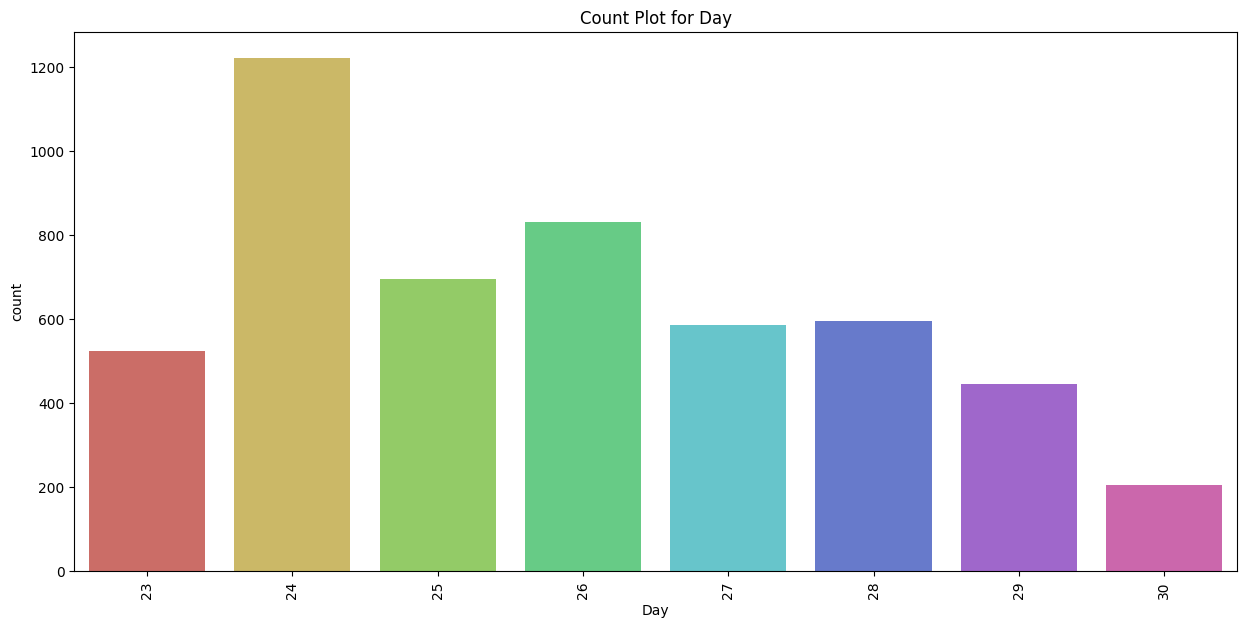

In [57]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Day')
sns.countplot(x = 'Day', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

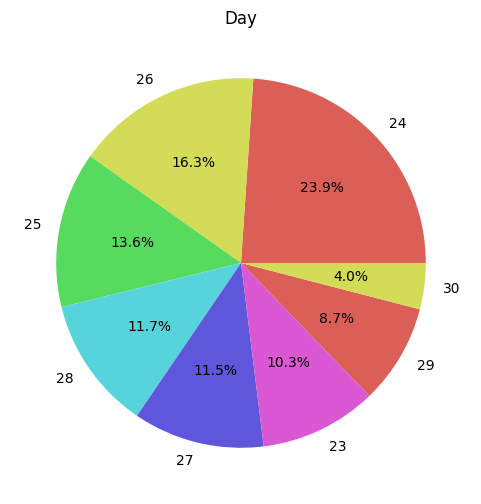

In [58]:
plt.figure(figsize=(15, 6))
counts = df1['Day'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Day')
plt.show()

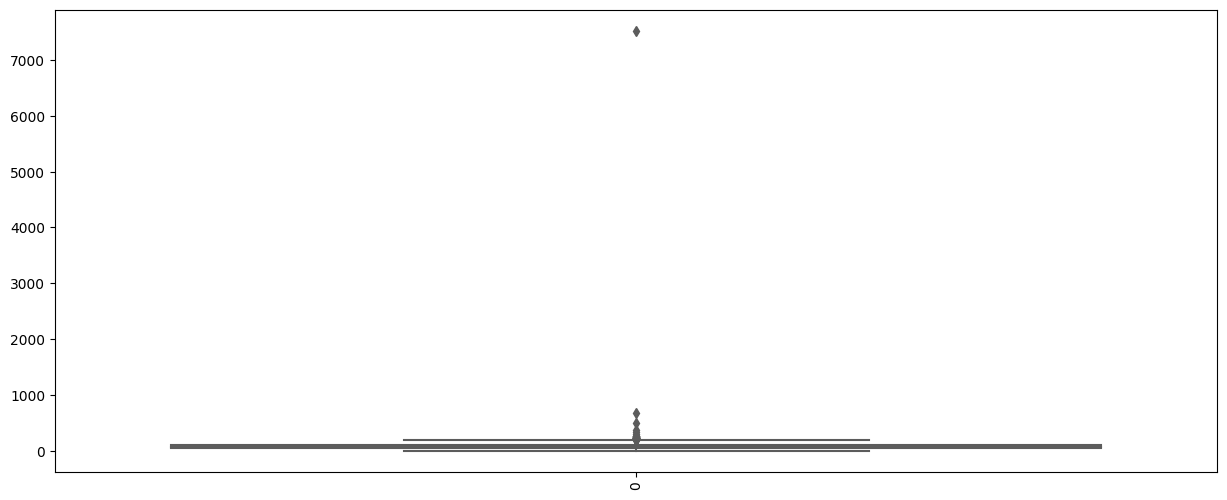

In [59]:
plt.figure(figsize=(15,6))
sns.boxplot(df1['Tweet_Length'],palette='hls')
plt.xticks(rotation=90)
plt.show()

In [60]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [61]:
sia = SIA()

In [62]:
df1['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df1['english_tweets'])]
df1['overall_sentiment'] = df1['sentiment'].apply(label_sentiment);

  0%|          | 0/5105 [00:00<?, ?it/s]

In [63]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
8     2023-06-30 09:04:09+00:00                0   
9     2023-06-30 09:00:33+00:00                2   
...                         ...              ...   
9994  2023-06-23 10:10:47+00:00                1   
9995  2023-06-23 10:09:41+00:00                1   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
8      @VikasAgarwalll Milord says: If my compatriots...   
9      Need to show our Gods are cooler than superher...   
...                                                  ...   
9994   Let the empowering lyrics of #Shivoham elevate...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
8      milord compatriots backstab ie end exposing fa...       en   
9      show gods cooler superheroes actor amidst crit...       en   
...                                                  ...      ...   
9994   empowering lyrics elevate spirit envelop world...       en   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  Year  Month  Day  \
0      womens ashes live streaming broadcast tv chann...  2023      6   30   
1                                    playing book ticket  2023      6   30   
3      adipurush vs hoorain vs kerala story controver...  2023      6   30   
8      milord compatriots backstab ie end exposing fa...  2023      6   30   
9      show gods cooler superheroes actor amidst crit...  2023      6   30   
...                                                  ...   ...    ...  ...   
9994   empowering lyrics elevate spirit envelop world...  2023      6   23   
9995   rangarajan garu poojari chilkur balaji appreci...  2023      6   23   
9998   empowering lyrics elevate spirit envelop world...  2023      6   23   
9999   choosing service product beneficial opt authen...  2023      6   23   
10000  film greatest epic earn boc worth budget shame...  2023      6   23   

           Time  Tweet_Length  sentiment overall_sentiment  
0      09:21:00            64     0.0000           neutral  
1      09:20:57            19     0.2023           neutral  
3      09:20:00            55     0.0000           neutral  
8      09:04:09           117     0.4767          positive  
9      09:00:33            51    -0.4404          negative  
...         ...           ...        ...               ...  
9994   10:10:47            78     0.7845          positive  
9995   10:09:41           153     0.7506          positive  
9998   10:08:17           116     0.7845          positive  
9999   10:08:01           103     0.9274          positive  
10000  10:07:45           143     0.4404          positive  

[5105 rows x 13 columns]

In [64]:
df1['overall_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [65]:
df1['overall_sentiment'].value_counts()

neutral     1993
negative    1785
positive    1327
Name: overall_sentiment, dtype: int64

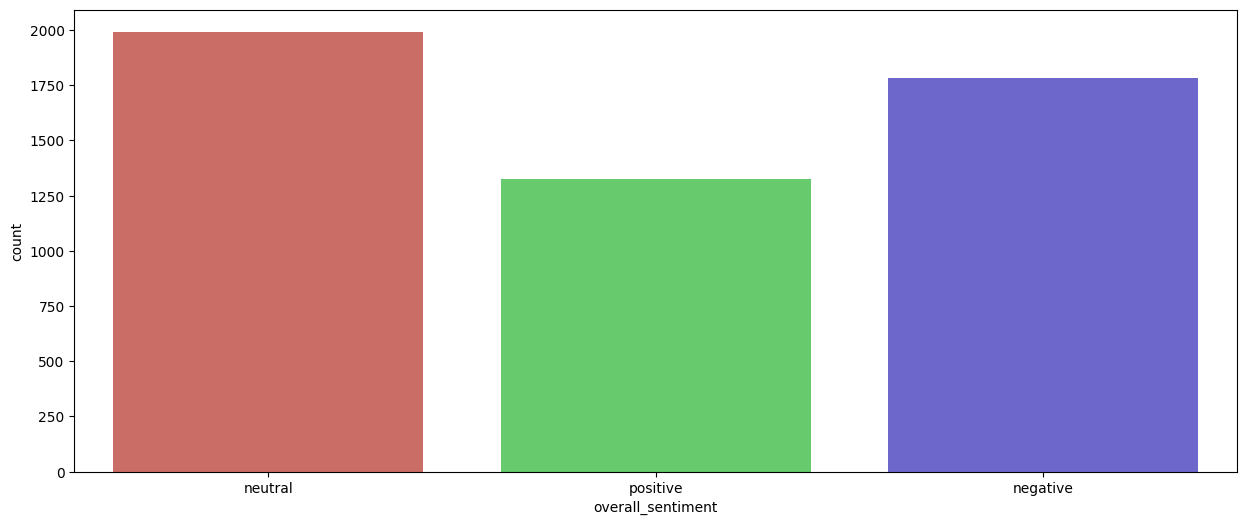

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(x='overall_sentiment', data = df1, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

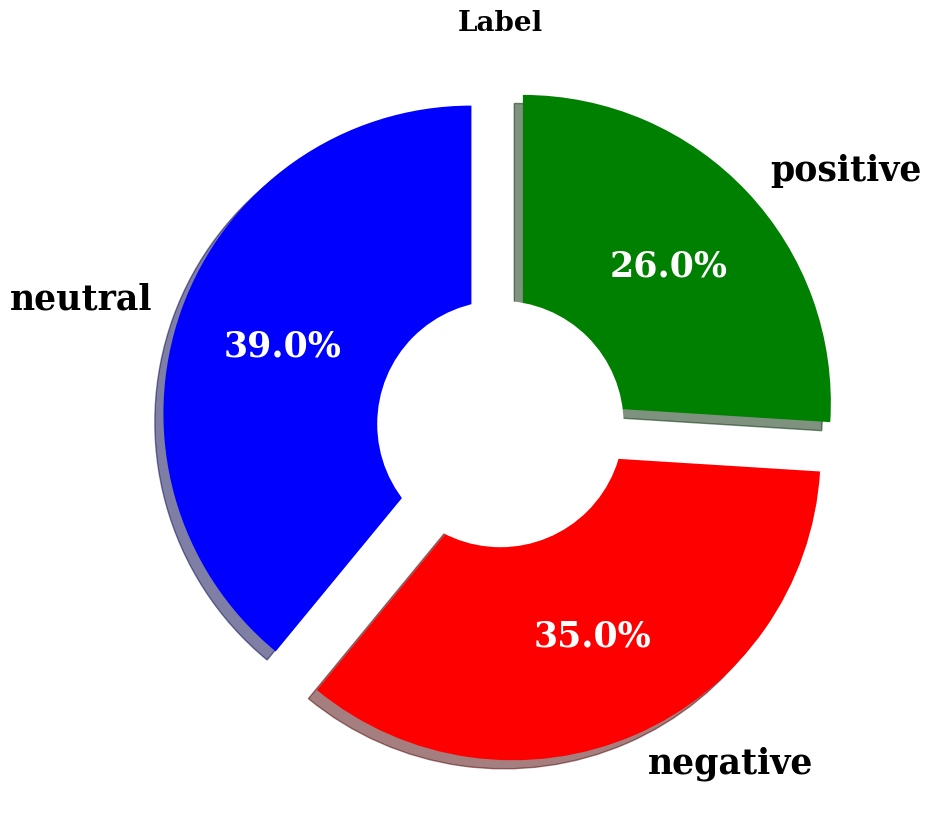

In [67]:
label_data = df1['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [68]:
df1

Date Created  Number of Likes  \
0     2023-06-30 09:21:00+00:00                0   
1     2023-06-30 09:20:57+00:00                0   
3     2023-06-30 09:20:00+00:00                3   
8     2023-06-30 09:04:09+00:00                0   
9     2023-06-30 09:00:33+00:00                2   
...                         ...              ...   
9994  2023-06-23 10:10:47+00:00                1   
9995  2023-06-23 10:09:41+00:00                1   
9998  2023-06-23 10:08:17+00:00             3101   
9999  2023-06-23 10:08:01+00:00                0   
10000 2023-06-23 10:07:45+00:00                0   

                                                  Tweets  \
0      #ENGvAUS #ENGvsAUS #AUSvENG #AUSvsENG #Adipuru...   
1      Now Playing!! Book Your Ticket Now!! 🎥🍿🎟️\n@go...   
3      Adipurush VS 72 Hoorain VS The Kerala Story Co...   
8      @VikasAgarwalll Milord says: If my compatriots...   
9      Need to show our Gods are cooler than superher...   
...                                                  ...   
9994   Let the empowering lyrics of #Shivoham elevate...   
9995   S Rangarajan garu, main poojari of chilkur bal...   
9998   Let the empowering lyrics of #Shivoham elevate...   
9999   When it comes to choosing a service or product...   
10000  A film about #Ramayana, our greatest epic coul...   

                                          Cleaned_Tweets Language  \
0      womens ashes live streaming broadcast tv chann...       en   
1                                    playing book ticket       en   
3      adipurush vs hoorain vs kerala story controver...       en   
8      milord compatriots backstab ie end exposing fa...       en   
9      show gods cooler superheroes actor amidst crit...       en   
...                                                  ...      ...   
9994   empowering lyrics elevate spirit envelop world...       en   
9995   rangarajan garu poojari chilkur balaji appreci...       en   
9998   empowering lyrics elevate spirit envelop world...       en   
9999   choosing service product beneficial opt authen...       en   
10000  film greatest epic earn boc worth budget shame...       en   

                                          english_tweets  Year  Month  Day  \
0      womens ashes live streaming broadcast tv chann...  2023      6   30   
1                                    playing book ticket  2023      6   30   
3      adipurush vs hoorain vs kerala story controver...  2023      6   30   
8      milord compatriots backstab ie end exposing fa...  2023      6   30   
9      show gods cooler superheroes actor amidst crit...  2023      6   30   
...                                                  ...   ...    ...  ...   
9994   empowering lyrics elevate spirit envelop world...  2023      6   23   
9995   rangarajan garu poojari chilkur balaji appreci...  2023      6   23   
9998   empowering lyrics elevate spirit envelop world...  2023      6   23   
9999   choosing service product beneficial opt authen...  2023      6   23   
10000  film greatest epic earn boc worth budget shame...  2023      6   23   

           Time  Tweet_Length  sentiment overall_sentiment  
0      09:21:00            64     0.0000           neutral  
1      09:20:57            19     0.2023           neutral  
3      09:20:00            55     0.0000           neutral  
8      09:04:09           117     0.4767          positive  
9      09:00:33            51    -0.4404          negative  
...         ...           ...        ...               ...  
9994   10:10:47            78     0.7845          positive  
9995   10:09:41           153     0.7506          positive  
9998   10:08:17           116     0.7845          positive  
9999   10:08:01           103     0.9274          positive  
10000  10:07:45           143     0.4404          positive  

[5105 rows x 13 columns]

In [69]:
df2 = df1[['english_tweets', 'overall_sentiment']]

In [70]:
df2

english_tweets overall_sentiment
0      womens ashes live streaming broadcast tv chann...           neutral
1                                    playing book ticket           neutral
3      adipurush vs hoorain vs kerala story controver...           neutral
8      milord compatriots backstab ie end exposing fa...          positive
9      show gods cooler superheroes actor amidst crit...          negative
...                                                  ...               ...
9994   empowering lyrics elevate spirit envelop world...          positive
9995   rangarajan garu poojari chilkur balaji appreci...          positive
9998   empowering lyrics elevate spirit envelop world...          positive
9999   choosing service product beneficial opt authen...          positive
10000  film greatest epic earn boc worth budget shame...          positive

[5105 rows x 2 columns]

In [71]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove extra white spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    # Split the text into words
    words = cleaned_text.split()
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the clean_text function to the 'english_tweets' column
df2['Cleaned_English_Tweets'] = df2['english_tweets'].apply(clean_text)

In [72]:
df2

english_tweets overall_sentiment  \
0      womens ashes live streaming broadcast tv chann...           neutral   
1                                    playing book ticket           neutral   
3      adipurush vs hoorain vs kerala story controver...           neutral   
8      milord compatriots backstab ie end exposing fa...          positive   
9      show gods cooler superheroes actor amidst crit...          negative   
...                                                  ...               ...   
9994   empowering lyrics elevate spirit envelop world...          positive   
9995   rangarajan garu poojari chilkur balaji appreci...          positive   
9998   empowering lyrics elevate spirit envelop world...          positive   
9999   choosing service product beneficial opt authen...          positive   
10000  film greatest epic earn boc worth budget shame...          positive   

                                  Cleaned_English_Tweets  
0      womens ashes live streaming broadcast tv chann...  
1                                    playing book ticket  
3      adipurush vs hoorain vs kerala story controver...  
8      milord compatriots backstab ie end exposing fa...  
9      show gods cooler superheroes actor amidst crit...  
...                                                  ...  
9994   empowering lyrics elevate spirit envelop world...  
9995   rangarajan garu poojari chilkur balaji appreci...  
9998   empowering lyrics elevate spirit envelop world...  
9999   choosing service product beneficial opt authen...  
10000  film greatest epic earn boc worth budget shame...  

[5105 rows x 3 columns]

In [73]:
df3 = df2[['Cleaned_English_Tweets', 'overall_sentiment']]

In [74]:
df3

Cleaned_English_Tweets overall_sentiment
0      womens ashes live streaming broadcast tv chann...           neutral
1                                    playing book ticket           neutral
3      adipurush vs hoorain vs kerala story controver...           neutral
8      milord compatriots backstab ie end exposing fa...          positive
9      show gods cooler superheroes actor amidst crit...          negative
...                                                  ...               ...
9994   empowering lyrics elevate spirit envelop world...          positive
9995   rangarajan garu poojari chilkur balaji appreci...          positive
9998   empowering lyrics elevate spirit envelop world...          positive
9999   choosing service product beneficial opt authen...          positive
10000  film greatest epic earn boc worth budget shame...          positive

[5105 rows x 2 columns]

In [75]:
import wordcloud

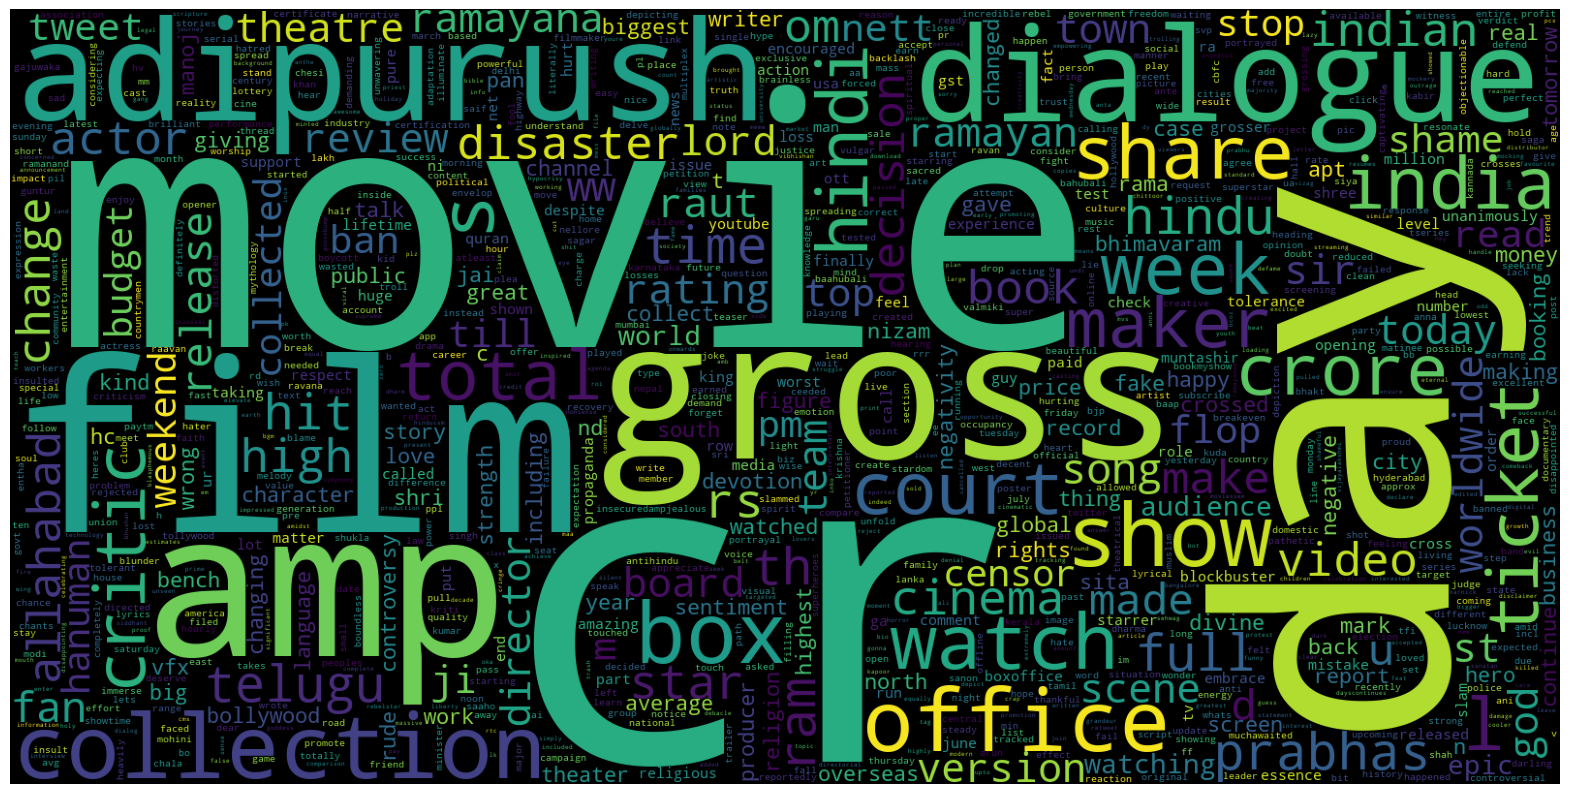

In [76]:
from wordcloud import WordCloud
data = df3['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

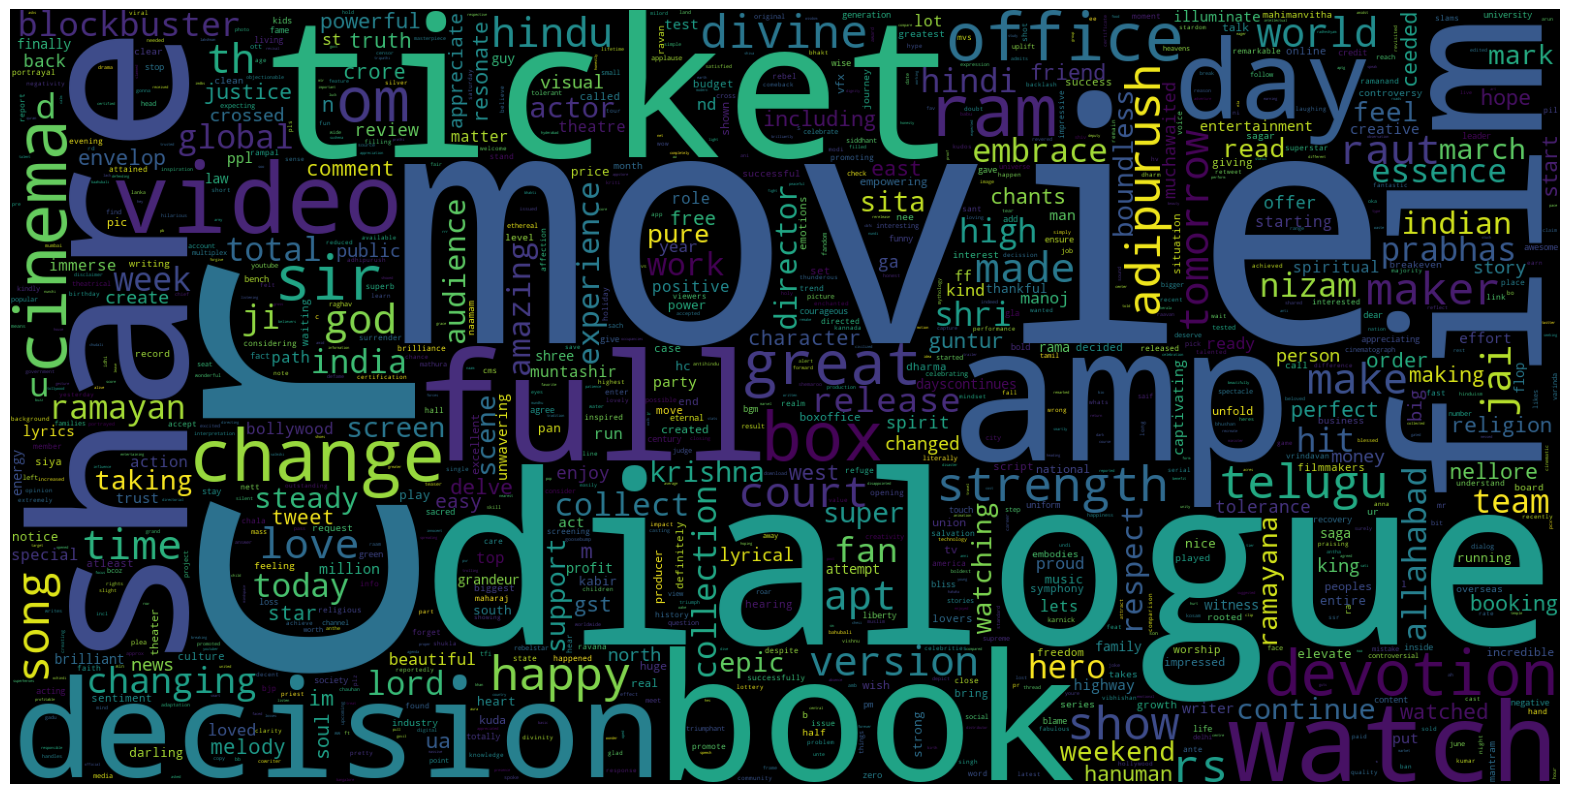

In [77]:
data = df3[df3['overall_sentiment']=="positive"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

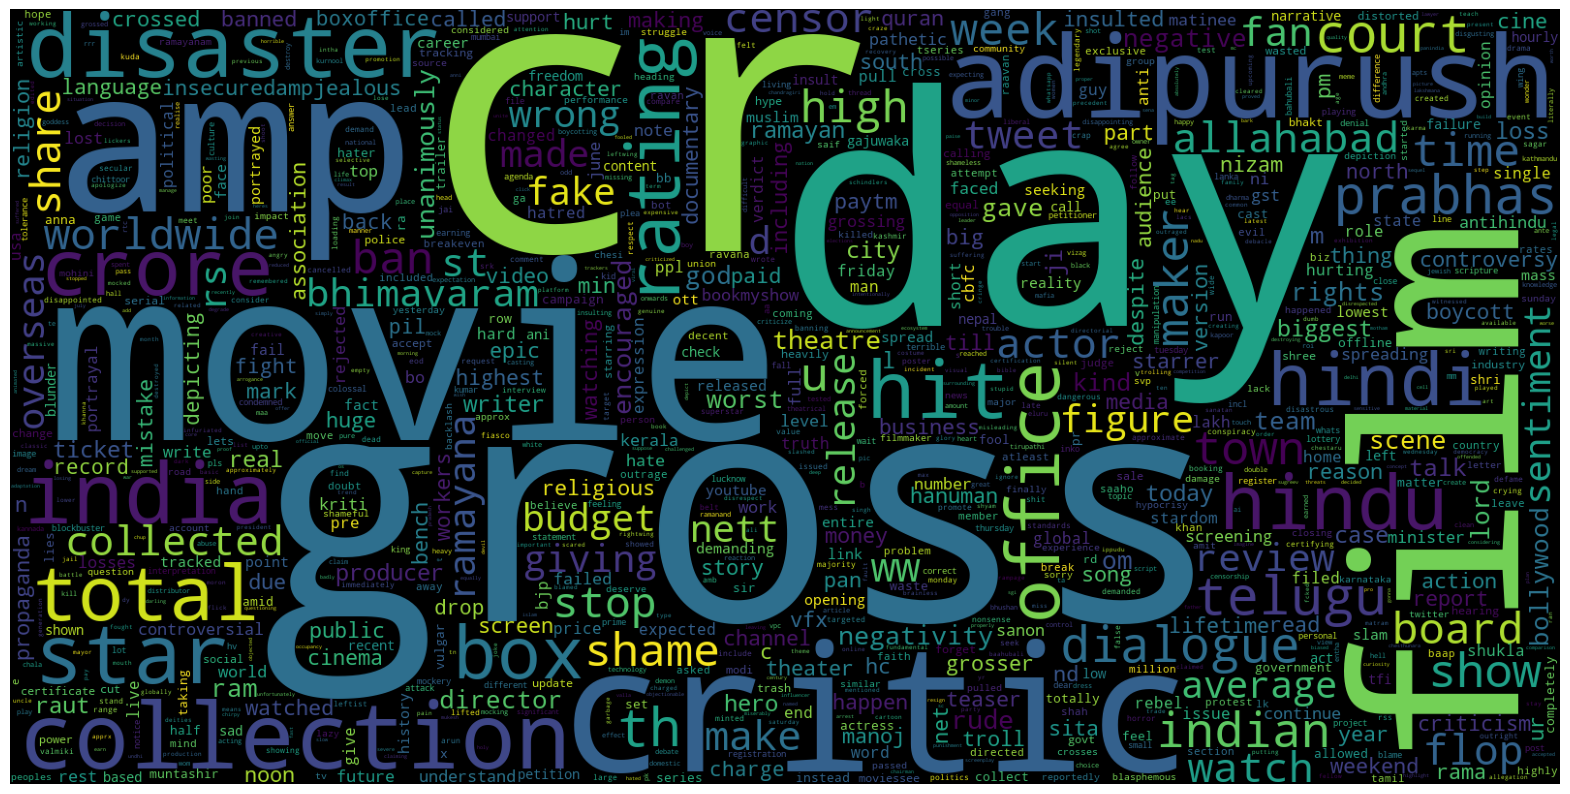

In [78]:

data = df3[df3['overall_sentiment']=="negative"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

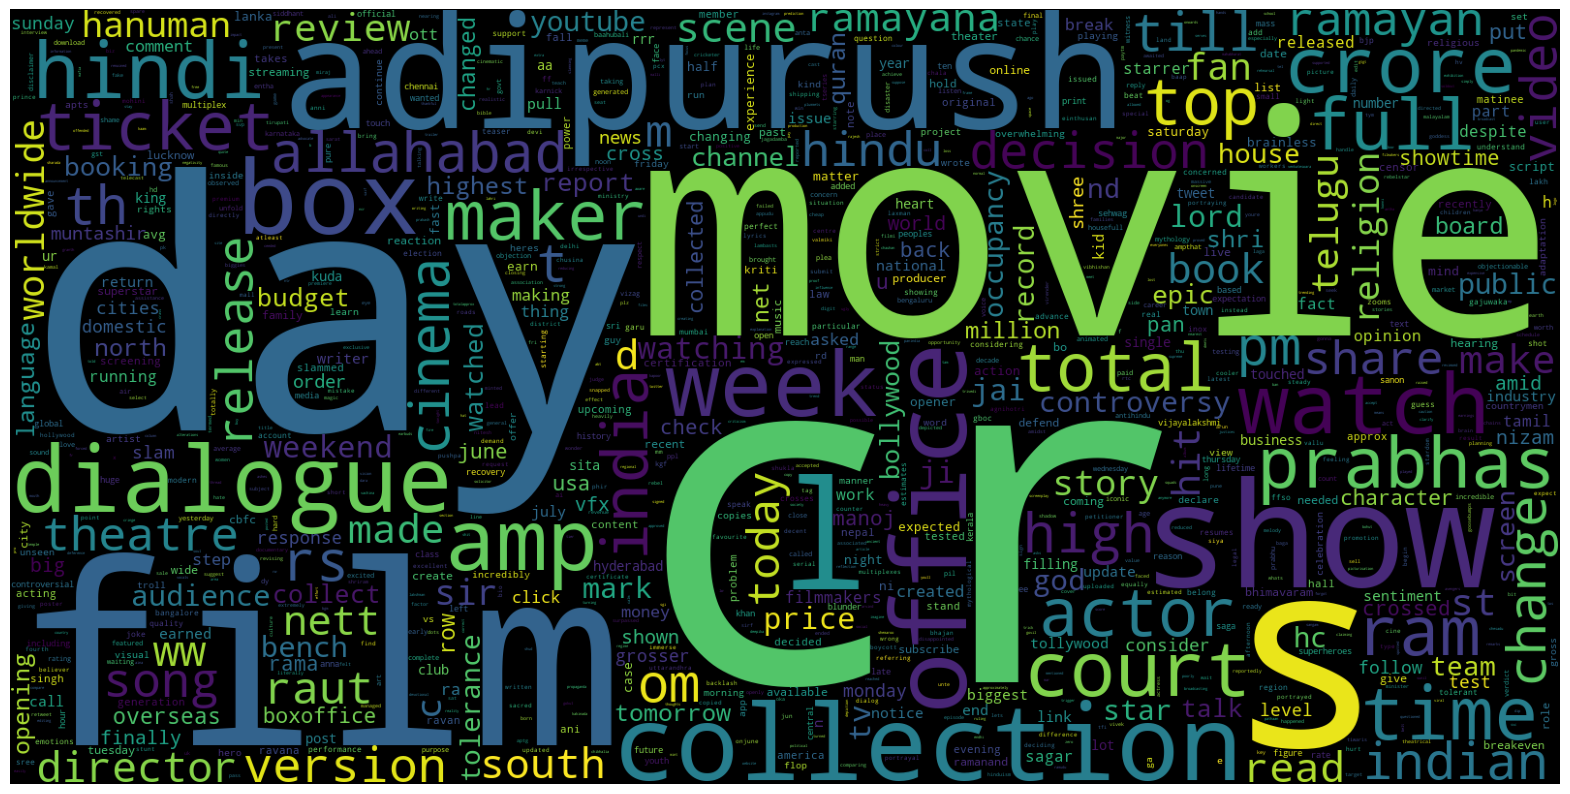

In [79]:
data = df3[df3['overall_sentiment']=="neutral"]['Cleaned_English_Tweets']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [80]:
# Load the libraries required for performing classification

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
# Split the data into training and testing data sets
# Use cleaned english as independent variable and overall sentiment as dependent variable

X = df3["Cleaned_English_Tweets"].values
y = df3['overall_sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.3)

In [111]:
# Extract features using TFIDF Vectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_idf = vectorizer.fit_transform(X_train)
X_test_idf = vectorizer.transform(X_test)
# Convert sparse TF-IDF matrices to dense numpy arrays
X_train_dense = X_train_idf.toarray()
X_test_dense = X_test_idf.toarray()


In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))


for name, model in models:
    model = model.fit(X_train_dense, y_train)
    y_pred = model.predict(X_test_dense)
    from sklearn import metrics

    print("%s -> ACC: %.2f%%" % (name, metrics.accuracy_score(y_test, y_pred) * 100))

Logistic Regression -> ACC: 74.87%
Naive Bayes -> ACC: 59.01%
Decision Tree (CART) -> ACC: 73.11%
K-NN -> ACC: 54.37%
SVM -> ACC: 74.54%
RandomForestClassifier -> ACC: 76.31%


In [114]:
models = []
models.append(('Logistic Regression', LogisticRegression()) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier())))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive bayes', MultinomialNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))

In [118]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model = model.fit(X_train_dense, y_train)
    y_pred = model.predict(X_test_dense)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred, average='weighted'), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred, average='weighted'), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred, average='weighted'), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})
df

Model  Accuracy  Precision  Recall  F1 Score
0       Logistic Regression     74.87      75.67   74.87     74.81
1  Decision Tree Classifier     74.02      74.22   74.02     74.02
2  Random Forest Classifier     77.15      78.40   77.15     77.14
3               Naive bayes     69.65      69.89   69.65     69.48
4      KNeighborsClassifier     54.37      68.43   54.37     51.57
5    Support Vector Machine     74.54      76.07   74.54     74.38

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Define the Random Forest Classifier with custom hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,         # Adjust as needed
    max_depth=None,           # You can experiment with this
    min_samples_split=2,      # You can experiment with this
    min_samples_leaf=1,       # You can experiment with this
    class_weight='balanced',  # Handle class imbalance
    max_features='auto',      # You can experiment with this
    random_state=42
)

# Fit the model to the training data
rf_classifier.fit(X_train_dense, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_dense, y_train, cv=5, scoring='accuracy')

# Predict on the test data
y_pred = rf_classifier.predict(X_test_dense)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Random Forest Model with Custom Hyperparameters:")
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))



In [83]:
# Print idf values
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names_out(),columns=["idf_weights"])
# Sort ascending
df_idf.sort_values(by=['idf_weights'],ascending = False).head()

idf_weights
narratives     7.795146
files          7.572003
artistic       7.572003
kashmir        7.572003
wing           7.572003

In [84]:
# Perform Multinomial Naive Bayes Classification
# Apply MultinomialNB on training data
mnb = MultinomialNB()
mnb.fit(X_train_idf, y_train)

MultinomialNB()

In [85]:
# Predict polarity by fitting the model to testing data
pred_mnb = mnb.predict(X_test_idf)

# Calculate accuracy of predicted values
acc = accuracy_score(y_test, pred_mnb)


results = pd.DataFrame([['Multinomial Naive Bayes', acc]],
               columns = ['Model', 'Accuracy'])

print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.696475


In [86]:
# Perform Random Forest classification on the processed data and compare the accuracy score of both these models

# Random Forest Classifier with 'gini'

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc]],
               columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.696475
1      Random Forest(Gini)  0.763708


In [87]:
# Random Forest Classifier with 'entropy'

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc]],
               columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.696475
1      Random Forest(Gini)  0.763708
2   Random Forest(Entropy)  0.755222


In [88]:
# Display confusion matrix for Random Forest

confusion_matrix(y_test,y_pred_rf) ### Confusion matrix for Random Forest

array([[415, 137,  10],
       [ 48, 500,  40],
       [ 24, 116, 242]], dtype=int64)